# Part 4: Pre-modelling

The goal of this notebook is to prepare the data for modelling.  

This entails determining optimal settings for:
1. Tokenization of Text Features
2. Scaling of non-token Features

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing my script
import functions_library as fl

In [3]:
#let's bring in the beauty review dataset with the cleaning and feature engineering steps applied
df = fl.pipedf('All_Beauty.json.gz')

### 1. Tokenization of Text Features
In order to use the reviewText and summary features for modelling, they need to be tokenized. First, let's begin by determining the optimal settings for the tokenizations of these features.
In the functions_library script file, I have predefined 2 tokenization functions and a tf-idf vectorizer. Both  tokenizers remove stop words and punctuation. The difference is one stems words where as the other lemmatizes them.

Let's us determine if lemmatization or stemming is more optimal. Additionally, we need to determine the optimal min_df value. Lastly, I would like to use a ngram range of up to 2 in order to see any important 2 word combinations.


In [5]:
#obtaining number of tokens using tf idf vectorization based on varying min_df values for review text 
#using lemmatization or stemming
min_df_list = range(250,2001,250)
numTokens_lem = []
numTokens_stem = []

for i in min_df_list:
    
    #getting number of tokens using tf idf vectorizer using lemmatization or stemming
    print(f'beginning tokenization with min_df = {i}')
    tokens_l = (fl.tfidf(df['reviewText'], tokenizer=fl.spl_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with lemmatization for min_df = {i} complete')
    tokens_s = (fl.tfidf(df['reviewText'], tokenizer=fl.sps_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with stemming for min_df = {i} complete')

    #appending number of tokens to the appropriate list
    numTokens_lem.append(tokens_l)
    numTokens_stem.append(tokens_s)
    print(f'number of tokens appending to corresponding list. min_df = {i} complete')

beginning tokenization with min_df = 250
vectorization with lemmatization for min_df = 250 complete
vectorization with stemming for min_df = 250 complete
number of tokens appending to corresponding list. min_df = 250 complete
beginning tokenization with min_df = 500
vectorization with lemmatization for min_df = 500 complete
vectorization with stemming for min_df = 500 complete
number of tokens appending to corresponding list. min_df = 500 complete
beginning tokenization with min_df = 750
vectorization with lemmatization for min_df = 750 complete
vectorization with stemming for min_df = 750 complete
number of tokens appending to corresponding list. min_df = 750 complete
beginning tokenization with min_df = 1000
vectorization with lemmatization for min_df = 1000 complete
vectorization with stemming for min_df = 1000 complete
number of tokens appending to corresponding list. min_df = 1000 complete
beginning tokenization with min_df = 1250
vectorization with lemmatization for min_df = 1250

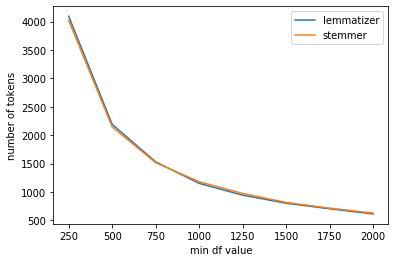

In [7]:
#plot num tokens for each tokenizer with varying min df values
plt.figure()
plt.plot(min_df_list, numTokens_lem, label='lemmatizer')
plt.plot(min_df_list, numTokens_stem, label='stemmer')
plt.legend()
plt.xlabel('min df value')
plt.ylabel('number of tokens')
plt.title('Number of tokens for reviewText using TF IDF vectorization and using lemmatization or stemming')
plt.show()

We can see that the rate of tokenization starts to slow down at around 1000 min df. So moving forward, I will use a min_df value of **1000** for reviews. At min df=1000, lemmatization is slightly lower then stemming so I will choose **lemmatization** as it will lead to less tokens (ie. less features) which usually is better for modelling.

Let's do the same for **summary**.

In [8]:
#obtaining number of tokens using tf idf vectorization based on varying min_df values for summary text 
#using lemmatization or stemming
min_df_list2 = range(200,1201,200)
numTokens_lem2 = []
numTokens_stem2 = []

for i in min_df_list2:
    
    #getting number of tokens using tf idf vectorizer using lemmatization or stemming
    print(f'beginning tokenization with min_df = {i}')
    tokens_l = (fl.tfidf(df['summary'], tokenizer=fl.spl_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with lemmatization for min_df = {i} complete')
    tokens_s = (fl.tfidf(df['summary'], tokenizer=fl.sps_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with stemming for min_df = {i} complete')

    #appending number of tokens to the appropriate list
    numTokens_lem2.append(tokens_l)
    numTokens_stem2.append(tokens_s)
    print(f'number of tokens appending to corresponding list. min_df = {i} complete')

beginning tokenization with min_df = 200
vectorization with lemmatization for min_df = 200 complete
vectorization with stemming for min_df = 200 complete
number of tokens appending to corresponding list. min_df = 200 complete
beginning tokenization with min_df = 400
vectorization with lemmatization for min_df = 400 complete
vectorization with stemming for min_df = 400 complete
number of tokens appending to corresponding list. min_df = 400 complete
beginning tokenization with min_df = 600
vectorization with lemmatization for min_df = 600 complete
vectorization with stemming for min_df = 600 complete
number of tokens appending to corresponding list. min_df = 600 complete
beginning tokenization with min_df = 800
vectorization with lemmatization for min_df = 800 complete
vectorization with stemming for min_df = 800 complete
number of tokens appending to corresponding list. min_df = 800 complete
beginning tokenization with min_df = 1000
vectorization with lemmatization for min_df = 1000 com

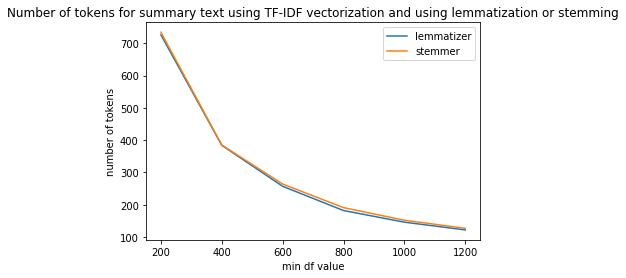

In [9]:
#plot num tokens for each tokenizer with varying min df values for summary text
plt.figure()
plt.plot(min_df_list2, numTokens_lem2, label='lemmatizer')
plt.plot(min_df_list2, numTokens_stem2, label='stemmer')
plt.legend()
plt.xlabel('min df value')
plt.ylabel('number of tokens')
plt.title('Number of tokens for summary text using TF-IDF vectorization and using lemmatization or stemming')
plt.show()

For summary, rate of descent slows down at around 800 so I will use a min df value of 800. Again, lemmatization produces a slightly lower numbewr of tokens compared to stemming so I will use lemmatization.

### 2. Scaling non-token Features
Now let's determine the optimal scaling for the non-token features. We will need to scale features as clustering methods are distance sensitive.

In [11]:
#let's grab all the numeric features (no tokens)
df2=df.select_dtypes(include=['int32','int64'])

Let's try using 3 different scalers and see how the change the data. Namely:
1. MinMaxScaler
2. RobustScaler
3. StandardScaler

#### MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#instantiate min max scaler
mm = MinMaxScaler()

In [14]:
#fit transform data to min max scaler
df3 = mm.fit_transform(df2)

In [16]:
#let's view quartiles of the features
pd.DataFrame(df3, columns = df2.columns).describe()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided
count,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000
mean,0.776901,0.869017,0.000383,0.015713,0.028757,0.481002,0.472838,0.189846,0.591986,0.100146,0.095310,0.909745
std,0.341191,0.337383,0.005001,0.024225,0.025106,0.313753,0.331407,0.392180,0.491466,0.300195,0.225108,0.286547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,1.000000,0.000000,0.002867,0.013423,0.181818,0.166667,0.000000,0.000000,0.000000,0.001846,1.000000
50%,1.000000,1.000000,0.000000,0.008600,0.013423,0.454545,0.500000,0.000000,1.000000,0.000000,0.010728,1.000000
75%,1.000000,1.000000,0.000000,0.018428,0.033557,0.727273,0.833333,0.000000,1.000000,0.000000,0.047180,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, the min max scaler bounds all features between 0 and 1. It is good as it doesn't distort the data and keeps the lower and upper bounds consistent which helps when performing clustering as the scales of all the features are the same.

#### RobustScaler

In [17]:
from sklearn.preprocessing import RobustScaler

In [19]:
#instantiate
rs = RobustScaler(with_centering=False)

In [20]:
#fit transform using robust scaler
df3 = rs.fit_transform(df2)

In [22]:
pd.DataFrame(df3, columns=df2.columns).describe()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided
count,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000,362252.000000
mean,4.107605,0.869017,1.041098,1.036068,1.428280,1.048504,0.709257,0.189846,0.591986,0.100146,2.104948,0.909745
std,1.364766,0.337383,13.608836,1.556795,1.246950,0.575214,0.497111,0.392180,0.491466,0.300195,4.965557,0.286547
min,1.000000,0.000000,0.000000,0.026316,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.002545,0.000000
25%,4.000000,1.000000,0.000000,0.210526,0.666667,0.500000,0.250000,0.000000,0.000000,0.000000,0.043257,1.000000
50%,5.000000,1.000000,0.000000,0.578947,0.666667,1.000000,0.750000,0.000000,1.000000,0.000000,0.239186,1.000000
75%,5.000000,1.000000,0.000000,1.210526,1.666667,1.500000,1.250000,0.000000,1.000000,0.000000,1.043257,1.000000
max,5.000000,1.000000,2721.000000,64.289474,49.666667,2.000000,1.500000,1.000000,1.000000,1.000000,22.061069,1.000000


The robust scaler is not a good candidate as the scales are different for the features.

#### StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#instantiate
ss = StandardScaler()

In [25]:
df3 = ss.fit_transform(df2)

In [27]:
pd.DataFrame(df3, columns = df2.columns).describe()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided
count,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05,3.622520e+05
mean,2.293038e-13,5.957658e-17,1.730003e-13,9.122542e-15,-1.188133e-14,1.664591e-15,1.043595e-14,-2.515092e-13,1.549990e-13,2.095669e-13,-1.502198e-14,2.104204e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.277027e+00,-2.575763e+00,-7.650176e-02,-6.486107e-01,-1.145420e+00,-1.533061e+00,-1.426761e+00,-4.840794e-01,-1.204531e+00,-3.336032e-01,-4.233978e-01,-3.174860e+00
25%,-7.884488e-02,3.882345e-01,-7.650176e-02,-5.302838e-01,-6.107818e-01,-9.535661e-01,-9.238539e-01,-4.840794e-01,-1.204531e+00,-3.336032e-01,-4.151988e-01,3.149745e-01
50%,6.538826e-01,3.882345e-01,-7.650176e-02,-2.936298e-01,-6.107818e-01,-8.432347e-02,8.195983e-02,-4.840794e-01,8.301988e-01,-3.336032e-01,-3.757412e-01,3.149745e-01
75%,6.538826e-01,3.882345e-01,-7.650176e-02,1.120626e-01,1.911759e-01,7.849192e-01,1.087774e+00,-4.840794e-01,8.301988e-01,-3.336032e-01,-2.138113e-01,3.149745e-01
max,6.538826e-01,3.882345e-01,1.998674e+02,4.063060e+01,3.868515e+01,1.654162e+00,1.590680e+00,2.065777e+00,8.301988e-01,2.997573e+00,4.018914e+00,3.149745e-01


As we have seen in a previous notebook, the data is heavily skewed and so using a standard scaler can heavily distort the data. The features are on different scales as well.

##### Based on the above, the min max scaler seems to be the best as it brings the values between 0 and 1 while maintaing scale. The robust and standard scalers distort the data since the data is heavily skewed.

Now the data is ready for modelling which is performed in the next notebook.